# Realizar un analisis de datos con la información del archivo: "satisfaccion_estudiantil.csv"

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# --- 1. Cargar y Explorar los datos ---

try:
    df = pd.read_csv('satisfaccion_estudiantil.csv', delimiter=',')
    print("Datos cargados correctamente. Aquí están las primeras 5 filas:")
    print(df.head())
    print("\nInformación general del DataFrame:")
    df.info()
except FileNotFoundError:
    print("Error: El archivo 'satisfaccion_estudiantil.csv' no se encontró. Asegúrate de que esté en el mismo directorio.")
    exit()

# Asegurar que las columnas de calificación sean numéricas.
columnas_calificaciones = ['Satisfaccion_general', 'Infraestructura', 'Calidad_docente', 'Apoyo_institucional']
for col in columnas_calificaciones:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Datos cargados correctamente. Aquí están las primeras 5 filas:
  Id_Estudiante Programa  Satisfaccion_general  Infraestructura  \
0  ID_EST_00001  Derecho                     1                3   
1  ID_EST_00002  Derecho                     1                3   
2  ID_EST_00003  Derecho                     5                5   
3  ID_EST_00004  Derecho                     5                5   
4  ID_EST_00005  Derecho                     4                1   

   Calidad_docente  Apoyo_institucional  
0                4                    1  
1                5                    2  
2                4                    4  
3                2                    5  
4                3                    2  

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id_Estudiante         9999 non-null


--- Análisis de Satisfacción Promedio por Programa Académico ---
                            Satisfaccion_general  Infraestructura  \
Programa                                                            
Administración de Empresas              3.001200         3.006400   
Derecho                                 2.980400         3.045600   
Ingeniería de Producción                3.022000         3.022400   
Psicología                              2.997199         2.972789   

                            Calidad_docente  Apoyo_institucional  
Programa                                                          
Administración de Empresas         2.972800             2.979200  
Derecho                            2.984400             3.010000  
Ingeniería de Producción           3.022000             2.997200  
Psicología                         2.986795             2.989996  


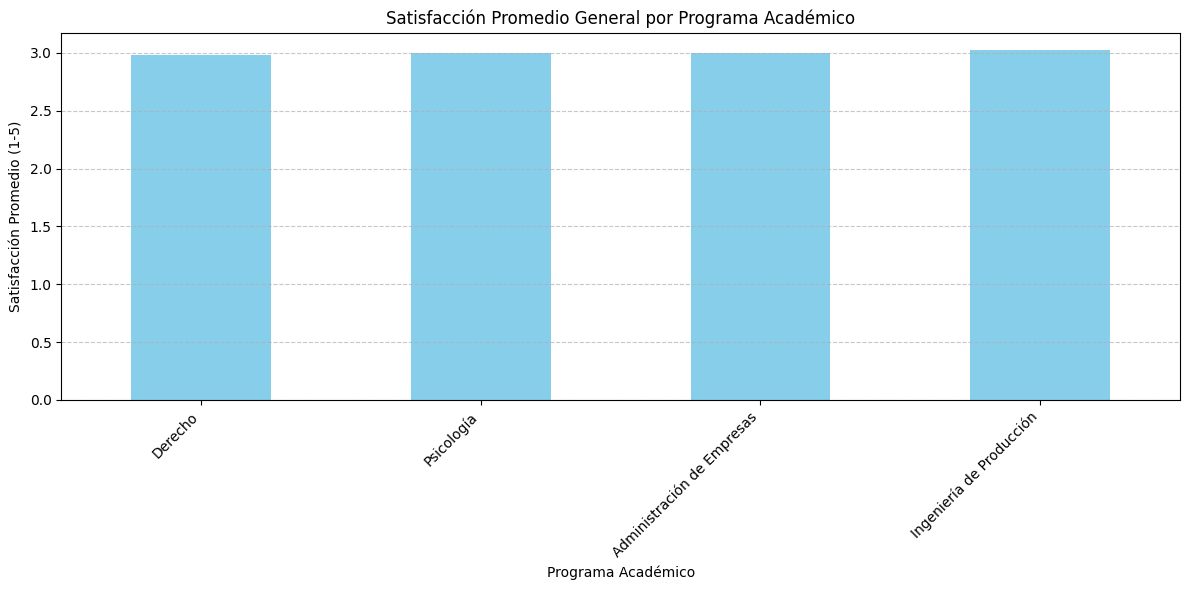

In [8]:
# --- 2. Análisis de la satisfacción promedio por programa académico ---
print("\n--- Análisis de Satisfacción Promedio por Programa Académico ---")
# Agrupar por 'Programa' y calcular el promedio de las calificaciones.
satisfaccion_por_programa = df.groupby('Programa')[columnas_calificaciones].mean()
print(satisfaccion_por_programa)

# Crear un gráfico de barras para visualizar la satisfacción promedio general por programa.
plt.figure(figsize=(12, 6))
satisfaccion_por_programa['Satisfaccion_general'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Satisfacción Promedio General por Programa Académico')
plt.xlabel('Programa Académico')
plt.ylabel('Satisfacción Promedio (1-5)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
# --- 3. Calcular la satisfacción promedio para cada estudiante ---
print("\n--- Satisfacción Promedio de cada Estudiante ---")
# Calcular la media de las columnas de calificaciones para cada fila (estudiante).
df['Satisfaccion_promedio_estudiante'] = df[columnas_calificaciones].mean(axis=1)
print(df[['Id_Estudiante', 'Programa', 'Satisfaccion_promedio_estudiante']].head())


--- Satisfacción Promedio de cada Estudiante ---
  Id_Estudiante Programa  Satisfaccion_promedio_estudiante
0  ID_EST_00001  Derecho                              2.25
1  ID_EST_00002  Derecho                              2.75
2  ID_EST_00003  Derecho                              4.50
3  ID_EST_00004  Derecho                              4.25
4  ID_EST_00005  Derecho                              2.50



--- Distribución de Calificaciones (Histogramas) ---


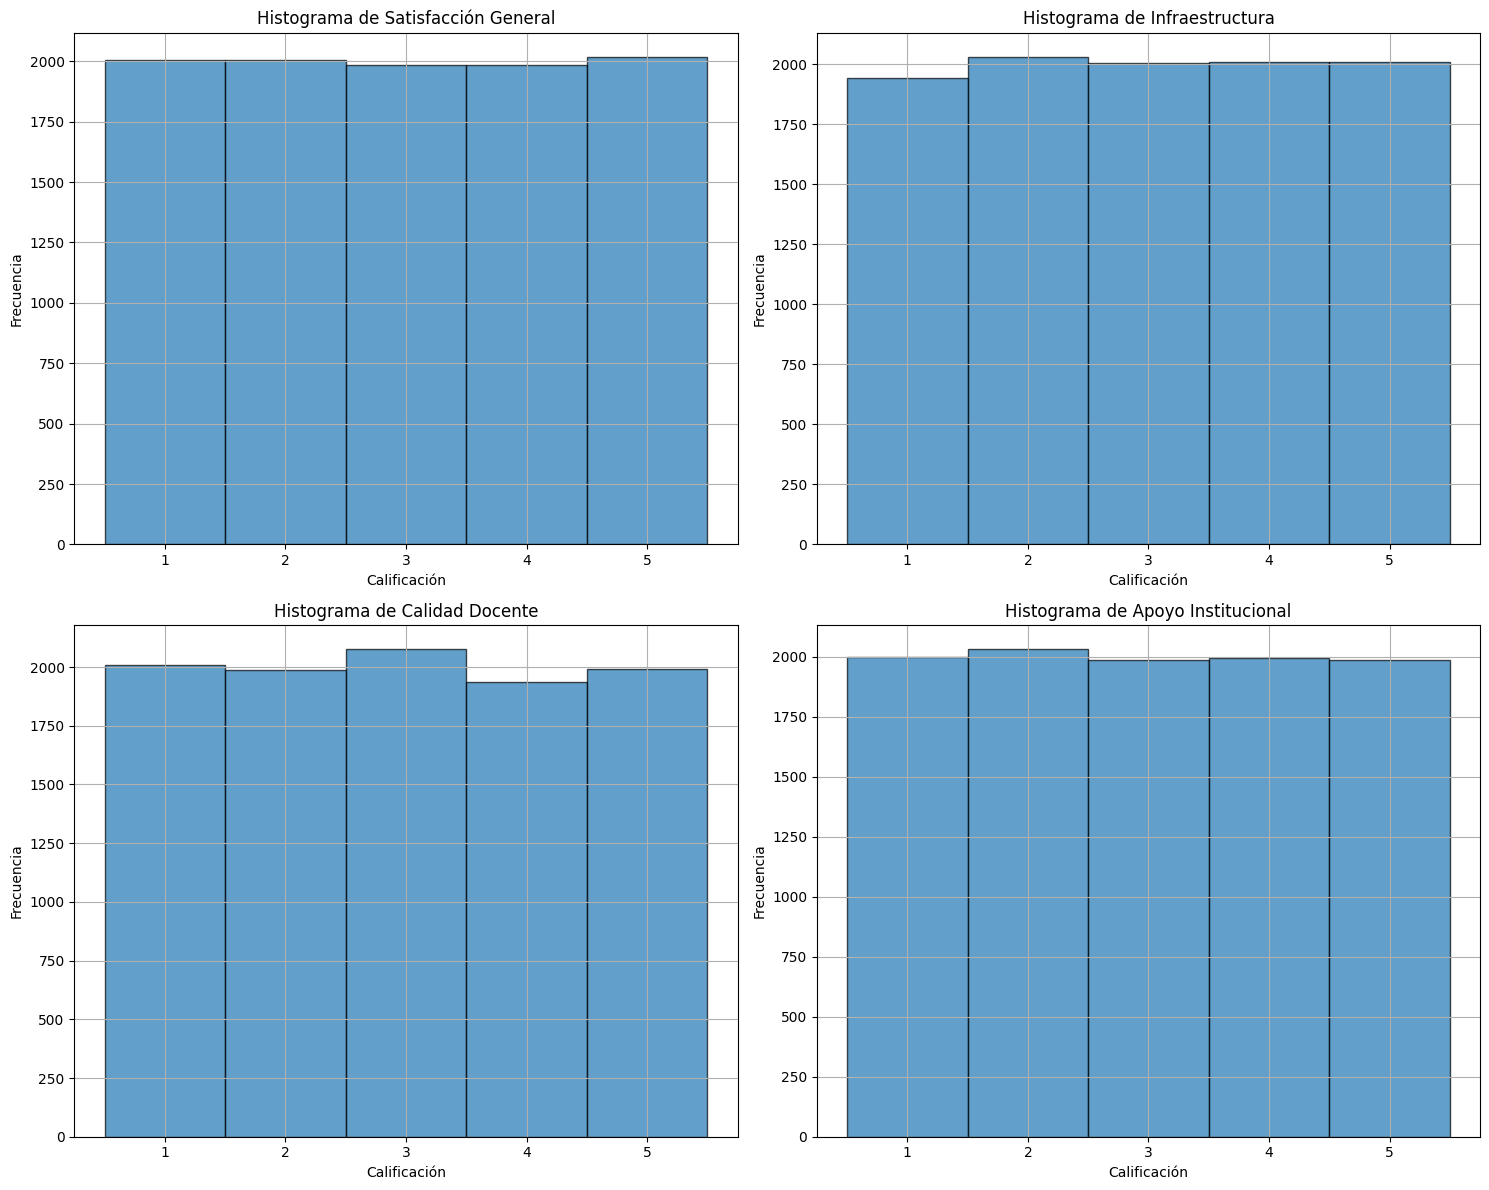


Análisis completado. Se han generado los gráficos y las tablas de resumen.


In [10]:
# --- 4. Visualizar la distribución de calificaciones con histogramas ---
print("\n--- Distribución de Calificaciones (Histogramas) ---")
# Configurar la figura para mostrar múltiples gráficos.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

titulos = ['Satisfacción General', 'Infraestructura', 'Calidad Docente', 'Apoyo Institucional']

for i, col in enumerate(columnas_calificaciones):
    df[col].hist(bins=np.arange(0.5, 6.5, 1), ax=axes[i], edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histograma de {titulos[i]}')
    axes[i].set_xlabel('Calificación')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()

print("\nAnálisis completado. Se han generado los gráficos y las tablas de resumen.")